# Cleaning, Pre-Processing and Analyzing Data

© 2016 STREAMBRIGHT DATA LLC, ALL RIGHTS RESERVED

Cleaning and mining of real-world data, pre-processing techniques. How to do exploratory data analysis with summary statistics and visualisation.

## Data Types

* Nominal (eg.: type of cars, name of things)
* Ordinal (eg.: order runners finishing race)
* Interval (eg.: temperature)
* Ratio (eg.: height, weight)

![datatypes](../files/0201_data-types.png "Data Types")

### Built-in Data Types in Python

Numeric types, sequences, sets and mappings.

* Boolean
* Numeric
 * int
 * long
 * float
 * complex
* Sequences
 * str
 * byte
 * byte array 
 * List
 * Tuple
* Sets
 * set
 * frozen set
* Mappings
 * dic

### More Data Types with Packages

**Numpy**: Introduces structured arrays

**Pandas**: Introduces series and dataframe (built on numpy array)

In [1]:
import pandas as pd

series = pd.Series([1, 'Budapest', 2.344, -110578, 'Data Science Bootcamp'], index=['A', 'B', 'C', 'D', 'E'])
print series

A                        1
B                 Budapest
C                    2.344
D                  -110578
E    Data Science Bootcamp
dtype: object


In [2]:
data = {'year': [2010, 2011, 2012, 2011, 2012, 2010, 2011, 2012],
        'team': ['Bears', 'Bears', 'Bears', 'Packers', 'Packers', 'Lions', 'Lions', 'Lions'],
        'wins': [11, 8, 10, 15, 11, 6, 10, 4],
        'losses': [5, 8, 6, 1, 5, 10, 6, 12]}

football = pd.DataFrame(data, columns=['year', 'team', 'wins', 'losses'])
football

,year,team,wins,losses
0,2010,Bears,11,5
1,2011,Bears,8,8
2,2012,Bears,10,6
3,2011,Packers,15,1
4,2012,Packers,11,5
5,2010,Lions,6,10
6,2011,Lions,10,6
7,2012,Lions,4,12


## Analyzing Our Data

### Importing packages we will use

We will use the following packages for this session:
* `numpy` : basic math operators and data structures
* `pandas`: high-performance, easy-to-use data structures and data analysis tools for Python 
* `matpotlib`: basic visualization
* `seaborn`: advanced and "pretty" visualization

In [3]:
import pandas as pd
import numpy as np

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns


### Loading data and examining the data

`read_csv` is a basic function from pandas package for loading data into a dataframe object.

In [4]:
data = pd.read_csv("../files/bank.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

### Feature list with descriptions

**Bank client data:**

* 1 - age (numeric)
* 2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* 4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* 5 - default: has credit in default? (categorical: 'no','yes','unknown')
* 6 - housing: has housing loan? (categorical: 'no','yes','unknown')
* 7 - loan: has personal loan? (categorical: 'no','yes','unknown')

**Related with the last contact of the current campaign:**

* 8 - contact: contact communication type (categorical: 'cellular','telephone') 
* 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* 10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**Other attributes:**

* 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* 14 - previous: number of contacts performed before this campaign and for this client (numeric)
* 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

**Social and economic context attributes**

* 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
* 17 - cons.price.idx: consumer price index - monthly indicator (numeric) 
* 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
* 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
* 20 - nr.employed: number of employees - quarterly indicator (numeric)

**Output variable (desired target):**
* 21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [5]:
data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [6]:
data.tail(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [7]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
data.ix[:,1:6].describe()

,job,marital,education,default,housing
count,41188,41188,41188,41188,41188
unique,12,4,8,3,3
top,admin.,married,university.degree,no,yes
freq,10422,24928,12168,32588,21576


In [9]:
data.shape

(41188, 21)

### Slicing and Dicing Data

In [10]:
data[:5]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [11]:
data[['age','education']].head(5)

,age,education
0,56,basic.4y
1,57,high.school
2,37,high.school
3,40,basic.6y
4,56,high.school


In [12]:
data.age.tail(5)

41183    73
41184    46
41185    56
41186    44
41187    74
Name: age, dtype: int64

In [13]:
data.loc[0:9,['age','job']]

,age,job
0,56,housemaid
1,57,services
2,37,services
3,40,admin.
4,56,services
5,45,services
6,59,admin.
7,41,blue-collar
8,24,technician
9,25,services


In [14]:
data.ix[(data.age == 40),['age','job']].head(5)

,age,job
3,40,admin.
47,40,blue-collar
120,40,blue-collar
148,40,admin.
154,40,blue-collar


### Inspecting (visualizing) our data feature by feature

In [15]:
data.ix[1:5,:10]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week
1,57,services,married,high.school,unknown,no,no,telephone,may,mon
2,37,services,married,high.school,no,yes,no,telephone,may,mon
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon
4,56,services,married,high.school,no,no,yes,telephone,may,mon
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon


In [16]:
data.age.describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

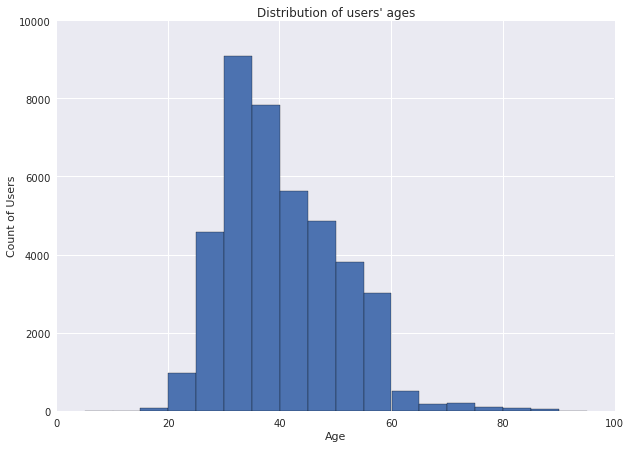

In [17]:
plt.figure(figsize=(10,7))
plt.hist(data.age, bins=range(0,100,5))
plt.title("Distribution of users' ages")
plt.ylabel('Count of Users')
plt.xlabel('Age');


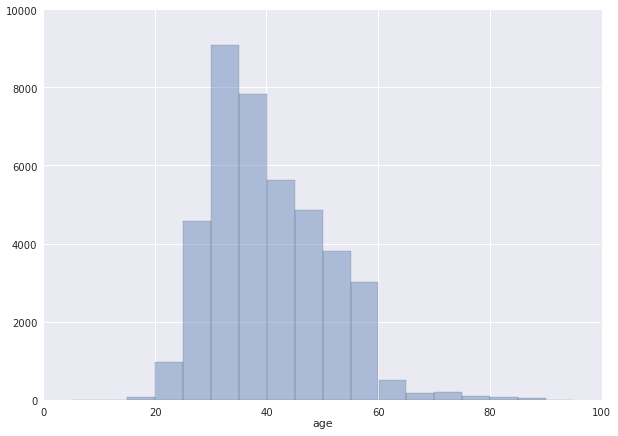

In [18]:
plt.figure(figsize=(10, 7))
sns.distplot(data.age, bins=range(0,100,5), kde=False)

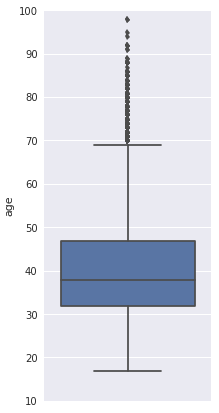

In [19]:
plt.figure(figsize=(3, 7))
sns.boxplot(y="age", data=data)

In [20]:
data.age.describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

In [21]:
data.ix[1:5,0:10]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week
1,57,services,married,high.school,unknown,no,no,telephone,may,mon
2,37,services,married,high.school,no,yes,no,telephone,may,mon
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon
4,56,services,married,high.school,no,no,yes,telephone,may,mon
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon


In [22]:
data.job.describe()

count      41188
unique        12
top       admin.
freq       10422
Name: job, dtype: object

In [23]:
data.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

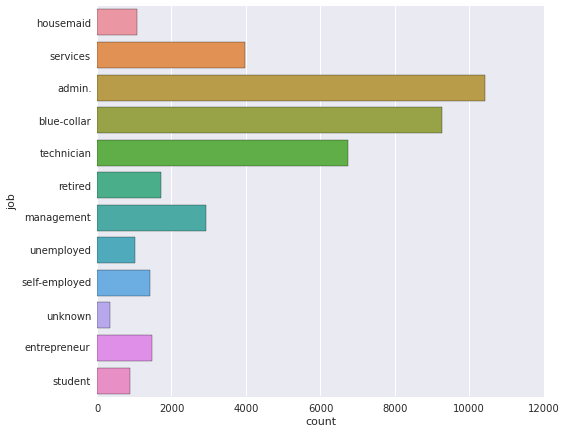

In [24]:
plt.figure(figsize=(8,7))
sns.countplot(y="job", data=data)

In [25]:
data.ix[:,1:10].describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week
count,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5
top,admin.,married,university.degree,no,yes,no,cellular,may,thu
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623


In [26]:
data.ix[1:5,10:]

,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
5,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


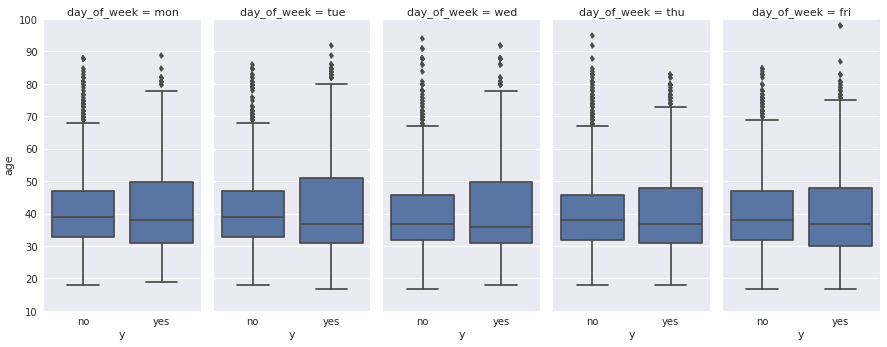

In [27]:
plt.figure(figsize=(3, 7))
g = sns.FacetGrid(data, col="day_of_week", size=5, aspect=.5)
g.map(sns.boxplot, "y", "age")

In [28]:
pd.crosstab(data["job"],data["education"],margins=True)

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown,All
job,,,,,,,,,
admin.,77,151,499,3329,1,363,5753,249,10422
blue-collar,2318,1426,3623,878,8,453,94,454,9254
entrepreneur,137,71,210,234,2,135,610,57,1456
housemaid,474,77,94,174,1,59,139,42,1060
management,100,85,166,298,0,89,2063,123,2924
retired,597,75,145,276,3,241,285,98,1720
self-employed,93,25,220,118,3,168,765,29,1421
services,132,226,388,2682,0,218,173,150,3969
student,26,13,99,357,0,43,170,167,875


## Cleaning the Data

Types of problems you have to deal with (beginner level :) ):
* Missing Values
* Incorrect Values
* Outliers

### Handling Missing Data

2 types of missing values:
* `None` - Python default missing value representation
* `NaN` - introduced by Numpy/Pandas

Creating a dataset with missing data.

In [29]:
raw_data = {'first_name': ['Chandler', np.nan, 'Monica', 'Joey', 'Ross', 'Rachel'],
        'last_name': ['Bing', np.nan, 'Geller', 'Tribbiani', 'Geller', 'Green'],
        'age': [42, np.nan, 36, 24, 73, 32],
        'sex': ['m', np.nan, 'f', 'm', 'm', 'f'],
        'preTestScore': [4, np.nan, np.nan, 2, 3, None],
        'postTestScore': [25, np.nan, np.nan, 62, 70, None]}
missing_data = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'sex', 'preTestScore', 'postTestScore'])
missing_data

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Chandler,Bing,42,m,4,25
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Monica,Geller,36,f,NaN,NaN
3,Joey,Tribbiani,24,m,2,62
4,Ross,Geller,73,m,3,70
5,Rachel,Green,32,f,NaN,NaN


#### Counting all the missing values in the dataframe

In [30]:
missing_data.isnull().sum()

first_name       1
last_name        1
age              1
sex              1
preTestScore     3
postTestScore    3
dtype: int64

#### Dropping missing values

We create a new object with the cleaned dataframe called `no_missing`.

In [31]:
no_missing = missing_data.dropna()
no_missing

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Chandler,Bing,42,m,4,25
3,Joey,Tribbiani,24,m,2,62
4,Ross,Geller,73,m,3,70


You can modify the dataframe itself by using the `inplace` argument.

In [32]:
missing_data
# missing_data.dropna(inplace=True)

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Chandler,Bing,42,m,4,25
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Monica,Geller,36,f,NaN,NaN
3,Joey,Tribbiani,24,m,2,62
4,Ross,Geller,73,m,3,70
5,Rachel,Green,32,f,NaN,NaN


We can drop rows where all cells in that row is NA.

In [33]:
missing_data.dropna(how='all')

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Chandler,Bing,42,m,4,25
2,Monica,Geller,36,f,NaN,NaN
3,Joey,Tribbiani,24,m,2,62
4,Ross,Geller,73,m,3,70
5,Rachel,Green,32,f,NaN,NaN


Let's create a new column and fill in with missing data.

In [34]:
missing_data['location'] = np.nan
missing_data

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Chandler,Bing,42,m,4,25,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Monica,Geller,36,f,NaN,NaN,NaN
3,Joey,Tribbiani,24,m,2,62,NaN
4,Ross,Geller,73,m,3,70,NaN
5,Rachel,Green,32,f,NaN,NaN,NaN


Now drop the column where "all" the data missing.

In [35]:
missing_data.dropna(axis=1, how='all')

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Chandler,Bing,42,m,4,25
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Monica,Geller,36,f,NaN,NaN
3,Joey,Tribbiani,24,m,2,62
4,Ross,Geller,73,m,3,70
5,Rachel,Green,32,f,NaN,NaN


Or we can set a treshold we want to keep the rows/columns. Here we drop all rows which contains less than 4 observations.

In [36]:
missing_data.dropna(thresh=4, inplace=True)
missing_data

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Chandler,Bing,42,m,4,25,NaN
2,Monica,Geller,36,f,NaN,NaN,NaN
3,Joey,Tribbiani,24,m,2,62,NaN
4,Ross,Geller,73,m,3,70,NaN
5,Rachel,Green,32,f,NaN,NaN,NaN


#### Fill in missing data

We can fill in all the cells with zeros.

In [37]:
missing_data.fillna(0)

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Chandler,Bing,42,m,4,25,0
2,Monica,Geller,36,f,0,0,0
3,Joey,Tribbiani,24,m,2,62,0
4,Ross,Geller,73,m,3,70,0
5,Rachel,Green,32,f,0,0,0


In [38]:
missing_data.fillna(method="ffill")

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Chandler,Bing,42,m,4,25,NaN
2,Monica,Geller,36,f,4,25,NaN
3,Joey,Tribbiani,24,m,2,62,NaN
4,Ross,Geller,73,m,3,70,NaN
5,Rachel,Green,32,f,3,70,NaN


Or fill in missing data with averages. For `preTestScore` we will use the averages of all the existing values.

In [39]:
missing_data["preTestScore"].fillna(missing_data["preTestScore"].mean(), inplace=True)
missing_data

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Chandler,Bing,42,m,4,25,NaN
2,Monica,Geller,36,f,3,NaN,NaN
3,Joey,Tribbiani,24,m,2,62,NaN
4,Ross,Geller,73,m,3,70,NaN
5,Rachel,Green,32,f,3,NaN,NaN


For `postTestScore` we use the group averages for male and female.

In [40]:
missing_data["postTestScore"].fillna(missing_data.groupby("sex")["postTestScore"].transform("mean"), inplace=True)
missing_data

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Chandler,Bing,42,m,4,25,NaN
2,Monica,Geller,36,f,3,NaN,NaN
3,Joey,Tribbiani,24,m,2,62,NaN
4,Ross,Geller,73,m,3,70,NaN
5,Rachel,Green,32,f,3,NaN,NaN


In [41]:
missing_data.dropna(axis=1, how='all', inplace=True)
missing_data

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Chandler,Bing,42,m,4,25
2,Monica,Geller,36,f,3,NaN
3,Joey,Tribbiani,24,m,2,62
4,Ross,Geller,73,m,3,70
5,Rachel,Green,32,f,3,NaN


### Treating input errors

In [42]:
# Creating data with error

raw_data = {'first_name': ['Chandler', np.nan, 'Monica', 'Joey', 'Ross', 'Rachel'],
        'last_name': ['Bing', np.nan, 'Geller', 'Tribbiani', 'Geller', 'Green'],
        'age': [26, np.nan, 24, 26, 26, 24],
        'sex': ['f', np.nan, 'f', 'm', 'm', 'k'],
        'preTestScore': [4, np.nan, np.nan, 2, 3, None],
        'postTestScore': [25, np.nan, np.nan, 62, 70, None]}

incorrect_data = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'sex', 'preTestScore', 'postTestScore'])
incorrect_data

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Chandler,Bing,26,f,4,25
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Monica,Geller,24,f,NaN,NaN
3,Joey,Tribbiani,26,m,2,62
4,Ross,Geller,26,m,3,70
5,Rachel,Green,24,k,NaN,NaN


In [43]:
incorrect_data.sex.unique()

array(['f', nan, 'm', 'k'], dtype=object)

In [44]:
incorrect_data.sex.replace("k","incorrect", inplace=True)
incorrect_data

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Chandler,Bing,26,f,4,25
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Monica,Geller,24,f,NaN,NaN
3,Joey,Tribbiani,26,m,2,62
4,Ross,Geller,26,m,3,70
5,Rachel,Green,24,incorrect,NaN,NaN


In [45]:
incorrect_data.ix[5,"sex"] = "f"
incorrect_data.ix[0,"sex"] = "m"
incorrect_data

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Chandler,Bing,26,m,4,25
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Monica,Geller,24,f,NaN,NaN
3,Joey,Tribbiani,26,m,2,62
4,Ross,Geller,26,m,3,70
5,Rachel,Green,24,f,NaN,NaN


### Treating Outliers

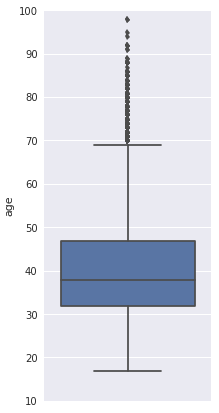

In [46]:
plt.figure(figsize=(3, 7))
sns.boxplot(y="age", data=data)

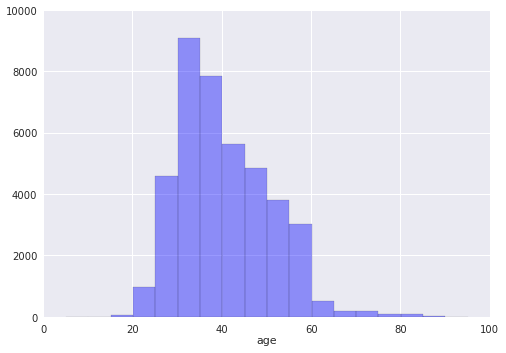

In [47]:
sns.distplot(data.age, bins=range(0,100,5), kde=False, color="blue")

In [48]:
np.percentile(data.age, 98)

62.0

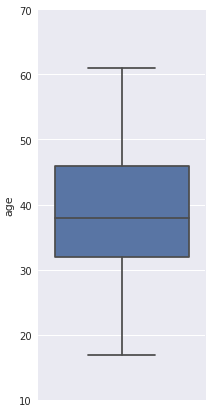

In [49]:
outlier_boundry = np.percentile(data.age, 98)

no_outliers = data.ix[(data.age < outlier_boundry)]

plt.figure(figsize=(3, 7))
sns.boxplot(y="age", data=no_outliers)

#### Other methods for dealing with outliers

- Transforming and binning values - log transformation to keep information from outliers but reduce variation
- Imputing - using mean, median, avg, etc.
- Treat separately - treating as a separate group / dataset and analyze it separately (when too many)